In [1]:
import copy
import dicom2nifti
import dicom2nifti.compressed_dicom as compressed_dicom
import importlib
import niftiutils.helper_fxns as hf
import niftiutils.transforms as tr
import niftiutils.registration as regs
import niftiutils.visualization as vis
import keras
import keras.layers as layers
import numpy as np
import os
import pandas as pd
import pylab
import shutil
import config
import cnn_builder as cbuild
from keras.models import Model
import dcgan as dcg
from keras.callbacks import EarlyStopping
%matplotlib inline

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
importlib.reload(config)
importlib.reload(cbuild)
C = config.Config()

model = cbuild.build_cnn(lr=.002)
model.summary()

#early_stopping = EarlyStopping(monitor='loss', min_delta=0.001, patience=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 64, 64, 32)        0         
_________________________________________________________________
reshape_55 (Reshape)         (None, 64, 2048)          0         
_________________________________________________________________
dense_27 (Dense)             (None, 64, 1024)          2098176   
_________________________________________________________________
batch_normalization_38 (Batc (None, 64, 1024)          4096      
_________________________________________________________________
dense_28 (Dense)             (None, 64, 1024)          1049600   
_________________________________________________________________
batch_normalization_39 (Batc (None, 64, 1024)          4096      
_________________________________________________________________
reshape_56 (Reshape)         (None, 64, 32, 32, 1)     0         
__________

In [58]:
hist = model.fit_generator(cbuild.train_generator(), steps_per_epoch=15, epochs=100)#, callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 4s 242ms/step - loss: 0.1595
Epoch 2/100
15/15 [==============================] - 2s 154ms/step - loss: 0.0916
Epoch 3/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0846
Epoch 4/100
15/15 [==============================] - 2s 151ms/step - loss: 0.0972
Epoch 5/100
15/15 [==============================] - 2s 151ms/step - loss: 0.0830
Epoch 6/100
15/15 [==============================] - 2s 152ms/step - loss: 0.0826
Epoch 7/100
15/15 [==============================] - 2s 152ms/step - loss: 0.0804
Epoch 8/100
15/15 [==============================] - 2s 152ms/step - loss: 0.0733
Epoch 9/100
15/15 [==============================] - 2s 154ms/step - loss: 0.0573
Epoch 10/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0554
Epoch 11/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0620
Epoch 12/100
15/15 [==============================] - 2s 153ms/step - loss: 0.0433
Epoch 13/100


KeyboardInterrupt: 

In [53]:
X,Y=next(cbuild.train_generator())

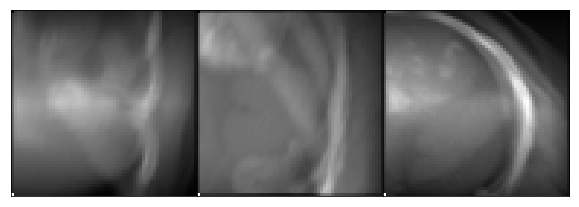

In [54]:
vis.draw_slices(X[0], normalize=[0,1])

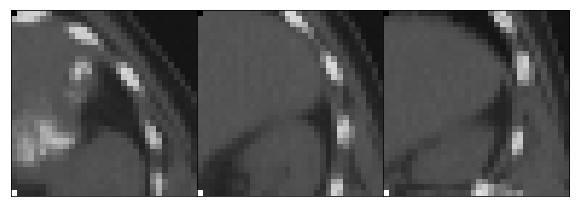

In [87]:
vis.draw_slices(Y[0], normalize=[0,1])

In [86]:
y_pred.shape

(32, 32, 32)

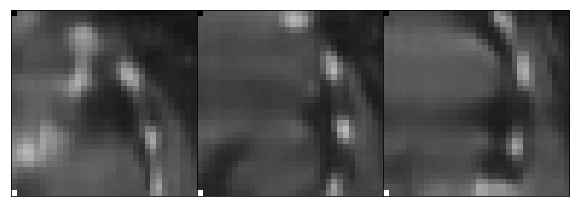

In [80]:
#y_pred = model.predict(X[:1])[0]
y_pred = dcgan.generator.predict(X[:1])[0]
vis.draw_slices(y_pred, normalize=[0,1])

In [ ]:
layers.BatchNormalization()

In [78]:
importlib.reload(dcg)
dcgan = dcg.DCGAN()
dcgan.train(epochs=10000, batch_size=8, save_interval=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 32, 32, 32)        0         
_________________________________________________________________
reshape_82 (Reshape)         (None, 32, 32, 32, 1)     0         
_________________________________________________________________
conv3d_62 (Conv3D)           (None, 30, 30, 30, 64)    1792      
_________________________________________________________________
conv3d_63 (Conv3D)           (None, 15, 15, 15, 64)    110656    
_________________________________________________________________
batch_normalization_71 (Batc (None, 15, 15, 15, 64)    256       
_________________________________________________________________
conv3d_64 (Conv3D)           (None, 8, 8, 8, 64)       110656    
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
__________

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\keras-2.1.2-py3.5.egg\keras\engine\training.py:945: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.805990, acc.: 37.50%] [G loss: 0.125079] [C loss: 0.642659]
1 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.117041] [C loss: 1.111043]
2 [D loss: 1.013528, acc.: 37.50%] [G loss: 0.100765] [C loss: 0.802222]
3 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.105306] [C loss: 1.396841]
4 [D loss: 1.241776, acc.: 50.00%] [G loss: 0.082751] [C loss: 1.138247]
5 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.093038] [C loss: 1.353363]
6 [D loss: 1.365288, acc.: 50.00%] [G loss: 0.094416] [C loss: 0.971725]
7 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.077331] [C loss: 0.941004]
8 [D loss: 1.358604, acc.: 56.25%] [G loss: 0.066406] [C loss: 0.860510]
9 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.068876] [C loss: 1.027691]
10 [D loss: 1.495440, acc.: 50.00%] [G loss: 0.061585] [C loss: 1.477662]
11 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.065514] [C loss: 0.893060]
12 [D loss: 1.928228, acc.: 37.50%] [G loss: 0.064022] [C loss: 1.468141]
13 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.079000] 

112 [D loss: 0.868654, acc.: 43.75%] [G loss: 0.021099] [C loss: 0.840649]
113 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015630] [C loss: 0.917310]
114 [D loss: 0.886561, acc.: 37.50%] [G loss: 0.016514] [C loss: 1.018362]
115 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012294] [C loss: 0.894759]
116 [D loss: 0.893258, acc.: 56.25%] [G loss: 0.013013] [C loss: 0.848575]
117 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.014028] [C loss: 0.856098]
118 [D loss: 0.924023, acc.: 56.25%] [G loss: 0.018840] [C loss: 0.952379]
119 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010923] [C loss: 0.805289]
120 [D loss: 0.889680, acc.: 62.50%] [G loss: 0.013022] [C loss: 0.782987]
121 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015125] [C loss: 1.084008]
122 [D loss: 0.916069, acc.: 50.00%] [G loss: 0.011061] [C loss: 0.796384]
123 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.017021] [C loss: 1.095506]
124 [D loss: 0.852505, acc.: 43.75%] [G loss: 0.015563] [C loss: 0.944797]
125 [D loss: 0.000000, acc.: 0.

222 [D loss: 0.904926, acc.: 43.75%] [G loss: 0.010673] [C loss: 0.810794]
223 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009869] [C loss: 0.879747]
224 [D loss: 0.809239, acc.: 56.25%] [G loss: 0.011888] [C loss: 0.765745]
225 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.013020] [C loss: 0.763656]
226 [D loss: 0.872645, acc.: 37.50%] [G loss: 0.014350] [C loss: 0.908266]
227 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009797] [C loss: 1.003183]
228 [D loss: 0.856265, acc.: 43.75%] [G loss: 0.009353] [C loss: 0.878975]
229 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008958] [C loss: 1.041059]
230 [D loss: 0.894331, acc.: 50.00%] [G loss: 0.010394] [C loss: 0.813949]
231 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012456] [C loss: 0.899333]
232 [D loss: 1.030101, acc.: 37.50%] [G loss: 0.014539] [C loss: 0.931491]
233 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015559] [C loss: 0.936323]
234 [D loss: 0.940906, acc.: 50.00%] [G loss: 0.011232] [C loss: 1.006791]
235 [D loss: 0.000000, acc.: 0.

332 [D loss: 0.797302, acc.: 56.25%] [G loss: 0.007532] [C loss: 0.730813]
333 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011131] [C loss: 0.737861]
334 [D loss: 0.801744, acc.: 37.50%] [G loss: 0.011687] [C loss: 0.753614]
335 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.022249] [C loss: 0.772365]
336 [D loss: 0.778511, acc.: 43.75%] [G loss: 0.008825] [C loss: 0.753961]
337 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008436] [C loss: 0.742647]
338 [D loss: 0.767202, acc.: 37.50%] [G loss: 0.012979] [C loss: 0.765080]
339 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011261] [C loss: 0.773913]
340 [D loss: 0.798169, acc.: 43.75%] [G loss: 0.008337] [C loss: 0.772697]
341 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015821] [C loss: 0.832234]
342 [D loss: 0.787067, acc.: 56.25%] [G loss: 0.014360] [C loss: 0.797877]
343 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007484] [C loss: 0.819704]
344 [D loss: 0.800640, acc.: 37.50%] [G loss: 0.011848] [C loss: 0.723264]
345 [D loss: 0.000000, acc.: 0.

442 [D loss: 0.840924, acc.: 50.00%] [G loss: 0.011738] [C loss: 0.742006]
443 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010271] [C loss: 0.790789]
444 [D loss: 0.774412, acc.: 50.00%] [G loss: 0.012055] [C loss: 0.812094]
445 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006431] [C loss: 0.723645]
446 [D loss: 0.844526, acc.: 62.50%] [G loss: 0.014582] [C loss: 0.741034]
447 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009013] [C loss: 0.758736]
448 [D loss: 0.751173, acc.: 43.75%] [G loss: 0.008206] [C loss: 0.816396]
449 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010070] [C loss: 0.759019]
450 [D loss: 0.794538, acc.: 56.25%] [G loss: 0.007264] [C loss: 0.742890]
451 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007647] [C loss: 0.716354]
452 [D loss: 0.751816, acc.: 56.25%] [G loss: 0.010177] [C loss: 0.738742]
453 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009931] [C loss: 0.775949]
454 [D loss: 0.762602, acc.: 50.00%] [G loss: 0.008092] [C loss: 0.717282]
455 [D loss: 0.000000, acc.: 0.

552 [D loss: 0.756090, acc.: 50.00%] [G loss: 0.007460] [C loss: 0.751030]
553 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007680] [C loss: 0.774030]
554 [D loss: 0.759334, acc.: 43.75%] [G loss: 0.009199] [C loss: 0.746316]
555 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010865] [C loss: 0.741903]
556 [D loss: 0.817465, acc.: 50.00%] [G loss: 0.007635] [C loss: 0.757043]
557 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008565] [C loss: 0.766026]
558 [D loss: 0.778245, acc.: 50.00%] [G loss: 0.008620] [C loss: 0.753732]
559 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008574] [C loss: 0.730077]
560 [D loss: 0.730986, acc.: 37.50%] [G loss: 0.011288] [C loss: 0.710623]
561 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011523] [C loss: 0.712428]
562 [D loss: 0.748011, acc.: 37.50%] [G loss: 0.007833] [C loss: 0.744757]
563 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007201] [C loss: 0.767029]
564 [D loss: 0.776277, acc.: 50.00%] [G loss: 0.007640] [C loss: 0.728121]
565 [D loss: 0.000000, acc.: 0.

662 [D loss: 0.840278, acc.: 43.75%] [G loss: 0.008284] [C loss: 0.732001]
663 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.021796] [C loss: 0.752473]
664 [D loss: 0.764219, acc.: 43.75%] [G loss: 0.011908] [C loss: 0.743688]
665 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010620] [C loss: 0.796645]
666 [D loss: 0.795858, acc.: 62.50%] [G loss: 0.008187] [C loss: 0.782975]
667 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010831] [C loss: 0.838442]
668 [D loss: 0.810011, acc.: 43.75%] [G loss: 0.011003] [C loss: 0.766068]
669 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009649] [C loss: 0.779403]
670 [D loss: 0.777748, acc.: 50.00%] [G loss: 0.007884] [C loss: 0.764425]
671 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011012] [C loss: 0.768970]
672 [D loss: 0.757313, acc.: 43.75%] [G loss: 0.009151] [C loss: 0.746487]
673 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008145] [C loss: 0.835351]
674 [D loss: 0.784250, acc.: 43.75%] [G loss: 0.010172] [C loss: 0.782528]
675 [D loss: 0.000000, acc.: 0.

772 [D loss: 0.729375, acc.: 56.25%] [G loss: 0.009905] [C loss: 0.749824]
773 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008731] [C loss: 0.822250]
774 [D loss: 0.759941, acc.: 37.50%] [G loss: 0.008068] [C loss: 0.779813]
775 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011895] [C loss: 1.020824]
776 [D loss: 0.889831, acc.: 50.00%] [G loss: 0.008518] [C loss: 0.764327]
777 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009020] [C loss: 0.906778]
778 [D loss: 0.760679, acc.: 43.75%] [G loss: 0.007949] [C loss: 0.738157]
779 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009229] [C loss: 0.750618]
780 [D loss: 0.767186, acc.: 50.00%] [G loss: 0.010447] [C loss: 0.755297]
781 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007127] [C loss: 0.740900]
782 [D loss: 0.839139, acc.: 75.00%] [G loss: 0.009054] [C loss: 0.816675]
783 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009074] [C loss: 0.861293]
784 [D loss: 0.843528, acc.: 50.00%] [G loss: 0.010781] [C loss: 0.800191]
785 [D loss: 0.000000, acc.: 0.

882 [D loss: 0.759138, acc.: 43.75%] [G loss: 0.010519] [C loss: 0.714997]
883 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009873] [C loss: 0.764160]
884 [D loss: 0.784890, acc.: 50.00%] [G loss: 0.006793] [C loss: 0.750888]
885 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011967] [C loss: 0.731789]
886 [D loss: 0.719328, acc.: 43.75%] [G loss: 0.006437] [C loss: 0.723483]
887 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008524] [C loss: 0.782268]
888 [D loss: 0.760224, acc.: 62.50%] [G loss: 0.006797] [C loss: 0.723619]
889 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008566] [C loss: 0.842907]
890 [D loss: 0.777991, acc.: 43.75%] [G loss: 0.007520] [C loss: 0.735776]
891 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007423] [C loss: 0.758420]
892 [D loss: 0.782554, acc.: 43.75%] [G loss: 0.010139] [C loss: 0.736496]
893 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008162] [C loss: 0.731409]
894 [D loss: 0.751575, acc.: 43.75%] [G loss: 0.007155] [C loss: 0.740101]
895 [D loss: 0.000000, acc.: 0.

993 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007972] [C loss: 0.698237]
994 [D loss: 0.698268, acc.: 0.00%] [G loss: 0.007403] [C loss: 0.698020]
995 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006654] [C loss: 0.698020]
996 [D loss: 0.698252, acc.: 0.00%] [G loss: 0.009067] [C loss: 0.697855]
997 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005686] [C loss: 0.697855]
998 [D loss: 0.698233, acc.: 0.00%] [G loss: 0.012088] [C loss: 0.697746]
999 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005976] [C loss: 0.697746]
1000 [D loss: 0.698215, acc.: 0.00%] [G loss: 0.009076] [C loss: 0.697689]
1001 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006116] [C loss: 0.697689]
1002 [D loss: 0.698199, acc.: 0.00%] [G loss: 0.006717] [C loss: 0.697679]
1003 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005179] [C loss: 0.697679]
1004 [D loss: 0.698184, acc.: 0.00%] [G loss: 0.009135] [C loss: 0.697709]
1005 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008694] [C loss: 0.697709]
1006 [D loss: 0.698174, acc.: 0.

1103 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006788] [C loss: 0.697998]
1104 [D loss: 0.698002, acc.: 0.00%] [G loss: 0.005883] [C loss: 0.697995]
1105 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006822] [C loss: 0.697995]
1106 [D loss: 0.697999, acc.: 0.00%] [G loss: 0.022715] [C loss: 0.697996]
1107 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010957] [C loss: 0.697996]
1108 [D loss: 0.697998, acc.: 0.00%] [G loss: 0.005869] [C loss: 0.697991]
1109 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009164] [C loss: 0.697991]
1110 [D loss: 0.697993, acc.: 0.00%] [G loss: 0.007223] [C loss: 0.697988]
1111 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007048] [C loss: 0.697988]
1112 [D loss: 0.697991, acc.: 0.00%] [G loss: 0.008143] [C loss: 0.697986]
1113 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009560] [C loss: 0.697986]
1114 [D loss: 0.697987, acc.: 0.00%] [G loss: 0.006284] [C loss: 0.697984]
1115 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007471] [C loss: 0.697984]
1116 [D loss: 0.697984, a

1213 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009243] [C loss: 0.697836]
1214 [D loss: 0.697836, acc.: 0.00%] [G loss: 0.007589] [C loss: 0.697830]
1215 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007006] [C loss: 0.697830]
1216 [D loss: 0.697833, acc.: 0.00%] [G loss: 0.006731] [C loss: 0.697832]
1217 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006670] [C loss: 0.697832]
1218 [D loss: 0.697831, acc.: 0.00%] [G loss: 0.006159] [C loss: 0.697829]
1219 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015444] [C loss: 0.697829]
1220 [D loss: 0.697829, acc.: 0.00%] [G loss: 0.006630] [C loss: 0.697826]
1221 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007717] [C loss: 0.697826]
1222 [D loss: 0.697826, acc.: 0.00%] [G loss: 0.006811] [C loss: 0.697823]
1223 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007568] [C loss: 0.697823]
1224 [D loss: 0.697822, acc.: 0.00%] [G loss: 0.007685] [C loss: 0.697820]
1225 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006432] [C loss: 0.697820]
1226 [D loss: 0.697821, a

1323 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.016487] [C loss: 0.697693]
1324 [D loss: 0.697696, acc.: 0.00%] [G loss: 0.007204] [C loss: 0.697693]
1325 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006336] [C loss: 0.697693]
1326 [D loss: 0.697694, acc.: 0.00%] [G loss: 0.009262] [C loss: 0.697689]
1327 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005009] [C loss: 0.697689]
1328 [D loss: 0.697691, acc.: 0.00%] [G loss: 0.007547] [C loss: 0.697688]
1329 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011042] [C loss: 0.697688]
1330 [D loss: 0.697688, acc.: 0.00%] [G loss: 0.006997] [C loss: 0.697685]
1331 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007272] [C loss: 0.697685]
1332 [D loss: 0.697686, acc.: 0.00%] [G loss: 0.006913] [C loss: 0.697680]
1333 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006780] [C loss: 0.697680]
1334 [D loss: 0.697682, acc.: 0.00%] [G loss: 0.008044] [C loss: 0.697680]
1335 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006102] [C loss: 0.697680]
1336 [D loss: 0.697681, a

1433 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010273] [C loss: 0.697571]
1434 [D loss: 0.697570, acc.: 0.00%] [G loss: 0.009889] [C loss: 0.697568]
1435 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006764] [C loss: 0.697568]
1436 [D loss: 0.697568, acc.: 0.00%] [G loss: 0.010417] [C loss: 0.697566]
1437 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007879] [C loss: 0.697566]
1438 [D loss: 0.697566, acc.: 0.00%] [G loss: 0.006242] [C loss: 0.697566]
1439 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006922] [C loss: 0.697566]
1440 [D loss: 0.697564, acc.: 0.00%] [G loss: 0.007745] [C loss: 0.697564]
1441 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007483] [C loss: 0.697564]
1442 [D loss: 0.697564, acc.: 0.00%] [G loss: 0.008049] [C loss: 0.697561]
1443 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005437] [C loss: 0.697561]
1444 [D loss: 0.697561, acc.: 0.00%] [G loss: 0.005392] [C loss: 0.697558]
1445 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004495] [C loss: 0.697558]
1446 [D loss: 0.697559, a

1543 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006721] [C loss: 0.697459]
1544 [D loss: 0.697460, acc.: 0.00%] [G loss: 0.010060] [C loss: 0.697458]
1545 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006470] [C loss: 0.697458]
1546 [D loss: 0.697458, acc.: 0.00%] [G loss: 0.005370] [C loss: 0.697454]
1547 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008461] [C loss: 0.697454]
1548 [D loss: 0.697455, acc.: 0.00%] [G loss: 0.007438] [C loss: 0.697453]
1549 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006267] [C loss: 0.697453]
1550 [D loss: 0.697453, acc.: 0.00%] [G loss: 0.005939] [C loss: 0.697453]
1551 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006627] [C loss: 0.697453]
1552 [D loss: 0.697452, acc.: 0.00%] [G loss: 0.005662] [C loss: 0.697446]
1553 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008363] [C loss: 0.697446]
1554 [D loss: 0.697448, acc.: 0.00%] [G loss: 0.012281] [C loss: 0.697448]
1555 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006156] [C loss: 0.697448]
1556 [D loss: 0.697447, a

1653 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006611] [C loss: 0.697357]
1654 [D loss: 0.697358, acc.: 0.00%] [G loss: 0.012801] [C loss: 0.697354]
1655 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008027] [C loss: 0.697354]
1656 [D loss: 0.697355, acc.: 0.00%] [G loss: 0.007041] [C loss: 0.697354]
1657 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006252] [C loss: 0.697354]
1658 [D loss: 0.697354, acc.: 0.00%] [G loss: 0.006814] [C loss: 0.697351]
1659 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009377] [C loss: 0.697351]
1660 [D loss: 0.697352, acc.: 0.00%] [G loss: 0.007566] [C loss: 0.697351]
1661 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004994] [C loss: 0.697351]
1662 [D loss: 0.697351, acc.: 0.00%] [G loss: 0.010739] [C loss: 0.697349]
1663 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007389] [C loss: 0.697349]
1664 [D loss: 0.697349, acc.: 0.00%] [G loss: 0.005411] [C loss: 0.697347]
1665 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006789] [C loss: 0.697347]
1666 [D loss: 0.697348, a

1763 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008415] [C loss: 0.697264]
1764 [D loss: 0.697265, acc.: 0.00%] [G loss: 0.010574] [C loss: 0.697262]
1765 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007752] [C loss: 0.697262]
1766 [D loss: 0.697262, acc.: 0.00%] [G loss: 0.006657] [C loss: 0.697260]
1767 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007009] [C loss: 0.697260]
1768 [D loss: 0.697261, acc.: 0.00%] [G loss: 0.007972] [C loss: 0.697258]
1769 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007066] [C loss: 0.697258]
1770 [D loss: 0.697259, acc.: 0.00%] [G loss: 0.006524] [C loss: 0.697256]
1771 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005331] [C loss: 0.697256]
1772 [D loss: 0.697258, acc.: 0.00%] [G loss: 0.005381] [C loss: 0.697254]
1773 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008806] [C loss: 0.697254]
1774 [D loss: 0.697256, acc.: 0.00%] [G loss: 0.008823] [C loss: 0.697254]
1775 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007237] [C loss: 0.697254]
1776 [D loss: 0.697255, a

1873 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005775] [C loss: 0.697179]
1874 [D loss: 0.697178, acc.: 0.00%] [G loss: 0.006402] [C loss: 0.697177]
1875 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004107] [C loss: 0.697177]
1876 [D loss: 0.697178, acc.: 0.00%] [G loss: 0.008365] [C loss: 0.697176]
1877 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004623] [C loss: 0.697176]
1878 [D loss: 0.697176, acc.: 0.00%] [G loss: 0.011925] [C loss: 0.697173]
1879 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010931] [C loss: 0.697173]
1880 [D loss: 0.697174, acc.: 0.00%] [G loss: 0.013679] [C loss: 0.697172]
1881 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.019031] [C loss: 0.697172]
1882 [D loss: 0.697173, acc.: 0.00%] [G loss: 0.008724] [C loss: 0.697169]
1883 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009146] [C loss: 0.697169]
1884 [D loss: 0.697170, acc.: 0.00%] [G loss: 0.008625] [C loss: 0.697166]
1885 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005940] [C loss: 0.697166]
1886 [D loss: 0.697167, a

1983 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007345] [C loss: 0.697095]
1984 [D loss: 0.697096, acc.: 0.00%] [G loss: 0.006882] [C loss: 0.697095]
1985 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005486] [C loss: 0.697095]
1986 [D loss: 0.697094, acc.: 0.00%] [G loss: 0.007182] [C loss: 0.697093]
1987 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007261] [C loss: 0.697093]
1988 [D loss: 0.697094, acc.: 0.00%] [G loss: 0.004621] [C loss: 0.697090]
1989 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005917] [C loss: 0.697090]
1990 [D loss: 0.697092, acc.: 0.00%] [G loss: 0.005879] [C loss: 0.697089]
1991 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008802] [C loss: 0.697089]
1992 [D loss: 0.697091, acc.: 0.00%] [G loss: 0.010544] [C loss: 0.697089]
1993 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007124] [C loss: 0.697089]
1994 [D loss: 0.697089, acc.: 0.00%] [G loss: 0.007288] [C loss: 0.697088]
1995 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006258] [C loss: 0.697088]
1996 [D loss: 0.697088, a

2093 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008375] [C loss: 0.697017]
2094 [D loss: 0.697018, acc.: 0.00%] [G loss: 0.006490] [C loss: 0.697016]
2095 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004710] [C loss: 0.697016]
2096 [D loss: 0.697018, acc.: 0.00%] [G loss: 0.004918] [C loss: 0.697016]
2097 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005221] [C loss: 0.697016]
2098 [D loss: 0.697016, acc.: 0.00%] [G loss: 0.005802] [C loss: 0.697013]
2099 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005289] [C loss: 0.697013]
2100 [D loss: 0.697014, acc.: 0.00%] [G loss: 0.005525] [C loss: 0.697011]
2101 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005486] [C loss: 0.697011]
2102 [D loss: 0.697013, acc.: 0.00%] [G loss: 0.006256] [C loss: 0.697010]
2103 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008697] [C loss: 0.697010]
2104 [D loss: 0.697012, acc.: 0.00%] [G loss: 0.008974] [C loss: 0.697009]
2105 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005792] [C loss: 0.697009]
2106 [D loss: 0.697011, a

2203 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006256] [C loss: 0.696945]
2204 [D loss: 0.696946, acc.: 0.00%] [G loss: 0.009165] [C loss: 0.696943]
2205 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007446] [C loss: 0.696943]
2206 [D loss: 0.696944, acc.: 0.00%] [G loss: 0.007595] [C loss: 0.696941]
2207 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005345] [C loss: 0.696941]
2208 [D loss: 0.696943, acc.: 0.00%] [G loss: 0.007053] [C loss: 0.696940]
2209 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011415] [C loss: 0.696940]
2210 [D loss: 0.696941, acc.: 0.00%] [G loss: 0.011522] [C loss: 0.696939]
2211 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006444] [C loss: 0.696939]
2212 [D loss: 0.696941, acc.: 0.00%] [G loss: 0.006866] [C loss: 0.696935]
2213 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012496] [C loss: 0.696935]
2214 [D loss: 0.696939, acc.: 0.00%] [G loss: 0.004933] [C loss: 0.696938]
2215 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005653] [C loss: 0.696938]
2216 [D loss: 0.696938, a

2313 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007298] [C loss: 0.696872]
2314 [D loss: 0.696873, acc.: 0.00%] [G loss: 0.005749] [C loss: 0.696870]
2315 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004670] [C loss: 0.696870]
2316 [D loss: 0.696872, acc.: 0.00%] [G loss: 0.005351] [C loss: 0.696870]
2317 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006623] [C loss: 0.696870]
2318 [D loss: 0.696870, acc.: 0.00%] [G loss: 0.004467] [C loss: 0.696868]
2319 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006548] [C loss: 0.696868]
2320 [D loss: 0.696869, acc.: 0.00%] [G loss: 0.005246] [C loss: 0.696866]
2321 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005667] [C loss: 0.696866]
2322 [D loss: 0.696867, acc.: 0.00%] [G loss: 0.009056] [C loss: 0.696865]
2323 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006569] [C loss: 0.696865]
2324 [D loss: 0.696866, acc.: 0.00%] [G loss: 0.006079] [C loss: 0.696866]
2325 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009846] [C loss: 0.696866]
2326 [D loss: 0.696865, a

2423 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005969] [C loss: 0.696800]
2424 [D loss: 0.696803, acc.: 0.00%] [G loss: 0.006003] [C loss: 0.696798]
2425 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005074] [C loss: 0.696798]
2426 [D loss: 0.696801, acc.: 0.00%] [G loss: 0.006153] [C loss: 0.696800]
2427 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007997] [C loss: 0.696800]
2428 [D loss: 0.696800, acc.: 0.00%] [G loss: 0.007003] [C loss: 0.696797]
2429 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005113] [C loss: 0.696797]
2430 [D loss: 0.696798, acc.: 0.00%] [G loss: 0.005919] [C loss: 0.696796]
2431 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.015578] [C loss: 0.696796]
2432 [D loss: 0.696798, acc.: 0.00%] [G loss: 0.005116] [C loss: 0.696794]
2433 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006868] [C loss: 0.696794]
2434 [D loss: 0.696796, acc.: 0.00%] [G loss: 0.004805] [C loss: 0.696795]
2435 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006239] [C loss: 0.696795]
2436 [D loss: 0.696795, a

2533 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008989] [C loss: 0.696733]
2534 [D loss: 0.696734, acc.: 0.00%] [G loss: 0.009887] [C loss: 0.696734]
2535 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005424] [C loss: 0.696734]
2536 [D loss: 0.696734, acc.: 0.00%] [G loss: 0.006231] [C loss: 0.696730]
2537 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005769] [C loss: 0.696730]
2538 [D loss: 0.696732, acc.: 0.00%] [G loss: 0.003996] [C loss: 0.696729]
2539 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005630] [C loss: 0.696729]
2540 [D loss: 0.696729, acc.: 0.00%] [G loss: 0.006550] [C loss: 0.696727]
2541 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006230] [C loss: 0.696727]
2542 [D loss: 0.696728, acc.: 0.00%] [G loss: 0.004430] [C loss: 0.696727]
2543 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004575] [C loss: 0.696727]
2544 [D loss: 0.696728, acc.: 0.00%] [G loss: 0.006137] [C loss: 0.696726]
2545 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006067] [C loss: 0.696726]
2546 [D loss: 0.696728, a

2643 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006725] [C loss: 0.696666]
2644 [D loss: 0.696669, acc.: 0.00%] [G loss: 0.006440] [C loss: 0.696664]
2645 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008758] [C loss: 0.696664]
2646 [D loss: 0.696666, acc.: 0.00%] [G loss: 0.007097] [C loss: 0.696665]
2647 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005689] [C loss: 0.696665]
2648 [D loss: 0.696666, acc.: 0.00%] [G loss: 0.006249] [C loss: 0.696663]
2649 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005151] [C loss: 0.696663]
2650 [D loss: 0.696665, acc.: 0.00%] [G loss: 0.019957] [C loss: 0.696662]
2651 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008116] [C loss: 0.696662]
2652 [D loss: 0.696664, acc.: 0.00%] [G loss: 0.005556] [C loss: 0.696660]
2653 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006516] [C loss: 0.696660]
2654 [D loss: 0.696662, acc.: 0.00%] [G loss: 0.008928] [C loss: 0.696658]
2655 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006281] [C loss: 0.696658]
2656 [D loss: 0.696660, a

2753 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011636] [C loss: 0.696599]
2754 [D loss: 0.696600, acc.: 0.00%] [G loss: 0.009081] [C loss: 0.696598]
2755 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007006] [C loss: 0.696598]
2756 [D loss: 0.696599, acc.: 0.00%] [G loss: 0.005907] [C loss: 0.696596]
2757 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006909] [C loss: 0.696596]
2758 [D loss: 0.696597, acc.: 0.00%] [G loss: 0.007644] [C loss: 0.696595]
2759 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006024] [C loss: 0.696595]
2760 [D loss: 0.696597, acc.: 0.00%] [G loss: 0.007206] [C loss: 0.696593]
2761 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007129] [C loss: 0.696593]
2762 [D loss: 0.696596, acc.: 0.00%] [G loss: 0.009293] [C loss: 0.696594]
2763 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005839] [C loss: 0.696594]
2764 [D loss: 0.696595, acc.: 0.00%] [G loss: 0.005024] [C loss: 0.696590]
2765 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006508] [C loss: 0.696590]
2766 [D loss: 0.696593, a

2863 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004516] [C loss: 0.696532]
2864 [D loss: 0.696535, acc.: 0.00%] [G loss: 0.005346] [C loss: 0.696530]
2865 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006298] [C loss: 0.696530]
2866 [D loss: 0.696531, acc.: 0.00%] [G loss: 0.005519] [C loss: 0.696532]
2867 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.027647] [C loss: 0.696532]
2868 [D loss: 0.696533, acc.: 0.00%] [G loss: 0.005047] [C loss: 0.696528]
2869 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005971] [C loss: 0.696528]
2870 [D loss: 0.696530, acc.: 0.00%] [G loss: 0.004214] [C loss: 0.696530]
2871 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.011757] [C loss: 0.696530]
2872 [D loss: 0.696530, acc.: 0.00%] [G loss: 0.006018] [C loss: 0.696527]
2873 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009965] [C loss: 0.696527]
2874 [D loss: 0.696528, acc.: 0.00%] [G loss: 0.005836] [C loss: 0.696526]
2875 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004856] [C loss: 0.696526]
2876 [D loss: 0.696527, a

2973 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005711] [C loss: 0.696465]
2974 [D loss: 0.696467, acc.: 0.00%] [G loss: 0.004160] [C loss: 0.696466]
2975 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008708] [C loss: 0.696466]
2976 [D loss: 0.696468, acc.: 0.00%] [G loss: 0.006600] [C loss: 0.696464]
2977 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005054] [C loss: 0.696464]
2978 [D loss: 0.696466, acc.: 0.00%] [G loss: 0.006114] [C loss: 0.696463]
2979 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004576] [C loss: 0.696463]
2980 [D loss: 0.696465, acc.: 0.00%] [G loss: 0.005436] [C loss: 0.696463]
2981 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008418] [C loss: 0.696463]
2982 [D loss: 0.696463, acc.: 0.00%] [G loss: 0.007170] [C loss: 0.696460]
2983 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007842] [C loss: 0.696460]
2984 [D loss: 0.696463, acc.: 0.00%] [G loss: 0.007436] [C loss: 0.696460]
2985 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004326] [C loss: 0.696460]
2986 [D loss: 0.696460, a

3083 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008381] [C loss: 0.696398]
3084 [D loss: 0.696401, acc.: 0.00%] [G loss: 0.012038] [C loss: 0.696397]
3085 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005550] [C loss: 0.696397]
3086 [D loss: 0.696400, acc.: 0.00%] [G loss: 0.005457] [C loss: 0.696397]
3087 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004945] [C loss: 0.696397]
3088 [D loss: 0.696400, acc.: 0.00%] [G loss: 0.005349] [C loss: 0.696394]
3089 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007298] [C loss: 0.696394]
3090 [D loss: 0.696397, acc.: 0.00%] [G loss: 0.005499] [C loss: 0.696395]
3091 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004395] [C loss: 0.696395]
3092 [D loss: 0.696397, acc.: 0.00%] [G loss: 0.004409] [C loss: 0.696394]
3093 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005267] [C loss: 0.696394]
3094 [D loss: 0.696396, acc.: 0.00%] [G loss: 0.006740] [C loss: 0.696391]
3095 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005375] [C loss: 0.696391]
3096 [D loss: 0.696394, a

3193 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004369] [C loss: 0.696332]
3194 [D loss: 0.696334, acc.: 0.00%] [G loss: 0.014254] [C loss: 0.696332]
3195 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010745] [C loss: 0.696332]
3196 [D loss: 0.696334, acc.: 0.00%] [G loss: 0.007390] [C loss: 0.696329]
3197 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006975] [C loss: 0.696329]
3198 [D loss: 0.696331, acc.: 0.00%] [G loss: 0.004890] [C loss: 0.696329]
3199 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005084] [C loss: 0.696329]
3200 [D loss: 0.696331, acc.: 0.00%] [G loss: 0.005834] [C loss: 0.696328]
3201 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004951] [C loss: 0.696328]
3202 [D loss: 0.696330, acc.: 0.00%] [G loss: 0.008776] [C loss: 0.696326]
3203 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005129] [C loss: 0.696326]
3204 [D loss: 0.696328, acc.: 0.00%] [G loss: 0.006699] [C loss: 0.696325]
3205 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005763] [C loss: 0.696325]
3206 [D loss: 0.696326, a

3303 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.014825] [C loss: 0.696264]
3304 [D loss: 0.696265, acc.: 0.00%] [G loss: 0.007011] [C loss: 0.696261]
3305 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004782] [C loss: 0.696261]
3306 [D loss: 0.696265, acc.: 0.00%] [G loss: 0.006542] [C loss: 0.696262]
3307 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006825] [C loss: 0.696262]
3308 [D loss: 0.696265, acc.: 0.00%] [G loss: 0.005894] [C loss: 0.696261]
3309 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007380] [C loss: 0.696261]
3310 [D loss: 0.696262, acc.: 0.00%] [G loss: 0.005492] [C loss: 0.696260]
3311 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003901] [C loss: 0.696260]
3312 [D loss: 0.696262, acc.: 0.00%] [G loss: 0.005011] [C loss: 0.696259]
3313 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004126] [C loss: 0.696259]
3314 [D loss: 0.696261, acc.: 0.00%] [G loss: 0.004918] [C loss: 0.696256]
3315 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005797] [C loss: 0.696256]
3316 [D loss: 0.696258, a

3413 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006206] [C loss: 0.696196]
3414 [D loss: 0.696198, acc.: 0.00%] [G loss: 0.005555] [C loss: 0.696197]
3415 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007077] [C loss: 0.696197]
3416 [D loss: 0.696198, acc.: 0.00%] [G loss: 0.007830] [C loss: 0.696193]
3417 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008385] [C loss: 0.696193]
3418 [D loss: 0.696194, acc.: 0.00%] [G loss: 0.006808] [C loss: 0.696191]
3419 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004946] [C loss: 0.696191]
3420 [D loss: 0.696193, acc.: 0.00%] [G loss: 0.006862] [C loss: 0.696191]
3421 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005506] [C loss: 0.696191]
3422 [D loss: 0.696193, acc.: 0.00%] [G loss: 0.004726] [C loss: 0.696189]
3423 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007115] [C loss: 0.696189]
3424 [D loss: 0.696191, acc.: 0.00%] [G loss: 0.020824] [C loss: 0.696189]
3425 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004544] [C loss: 0.696189]
3426 [D loss: 0.696190, a

3523 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008110] [C loss: 0.696124]
3524 [D loss: 0.696126, acc.: 0.00%] [G loss: 0.006464] [C loss: 0.696125]
3525 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006420] [C loss: 0.696125]
3526 [D loss: 0.696126, acc.: 0.00%] [G loss: 0.006695] [C loss: 0.696124]
3527 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006968] [C loss: 0.696124]
3528 [D loss: 0.696125, acc.: 0.00%] [G loss: 0.006135] [C loss: 0.696120]
3529 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010393] [C loss: 0.696120]
3530 [D loss: 0.696123, acc.: 0.00%] [G loss: 0.005350] [C loss: 0.696121]
3531 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005131] [C loss: 0.696121]
3532 [D loss: 0.696121, acc.: 0.00%] [G loss: 0.004975] [C loss: 0.696119]
3533 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007270] [C loss: 0.696119]
3534 [D loss: 0.696121, acc.: 0.00%] [G loss: 0.004883] [C loss: 0.696117]
3535 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004721] [C loss: 0.696117]
3536 [D loss: 0.696119, a

3633 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005037] [C loss: 0.696055]
3634 [D loss: 0.696057, acc.: 0.00%] [G loss: 0.007605] [C loss: 0.696053]
3635 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009224] [C loss: 0.696053]
3636 [D loss: 0.696056, acc.: 0.00%] [G loss: 0.009161] [C loss: 0.696053]
3637 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004205] [C loss: 0.696053]
3638 [D loss: 0.696055, acc.: 0.00%] [G loss: 0.004494] [C loss: 0.696052]
3639 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005410] [C loss: 0.696052]
3640 [D loss: 0.696053, acc.: 0.00%] [G loss: 0.008223] [C loss: 0.696051]
3641 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006614] [C loss: 0.696051]
3642 [D loss: 0.696052, acc.: 0.00%] [G loss: 0.005927] [C loss: 0.696048]
3643 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006443] [C loss: 0.696048]
3644 [D loss: 0.696051, acc.: 0.00%] [G loss: 0.004808] [C loss: 0.696048]
3645 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005977] [C loss: 0.696048]
3646 [D loss: 0.696049, a

3743 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006812] [C loss: 0.695984]
3744 [D loss: 0.695986, acc.: 0.00%] [G loss: 0.006331] [C loss: 0.695981]
3745 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007366] [C loss: 0.695981]
3746 [D loss: 0.695984, acc.: 0.00%] [G loss: 0.007693] [C loss: 0.695981]
3747 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004456] [C loss: 0.695981]
3748 [D loss: 0.695983, acc.: 0.00%] [G loss: 0.011295] [C loss: 0.695979]
3749 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005723] [C loss: 0.695979]
3750 [D loss: 0.695982, acc.: 0.00%] [G loss: 0.005098] [C loss: 0.695978]
3751 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007135] [C loss: 0.695978]
3752 [D loss: 0.695980, acc.: 0.00%] [G loss: 0.005392] [C loss: 0.695978]
3753 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007210] [C loss: 0.695978]
3754 [D loss: 0.695979, acc.: 0.00%] [G loss: 0.008552] [C loss: 0.695977]
3755 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005681] [C loss: 0.695977]
3756 [D loss: 0.695979, a

3853 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006665] [C loss: 0.695911]
3854 [D loss: 0.695912, acc.: 0.00%] [G loss: 0.005276] [C loss: 0.695909]
3855 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006213] [C loss: 0.695909]
3856 [D loss: 0.695910, acc.: 0.00%] [G loss: 0.007615] [C loss: 0.695909]
3857 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005273] [C loss: 0.695909]
3858 [D loss: 0.695911, acc.: 0.00%] [G loss: 0.006459] [C loss: 0.695907]
3859 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004824] [C loss: 0.695907]
3860 [D loss: 0.695909, acc.: 0.00%] [G loss: 0.005253] [C loss: 0.695906]
3861 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006528] [C loss: 0.695906]
3862 [D loss: 0.695909, acc.: 0.00%] [G loss: 0.005007] [C loss: 0.695904]
3863 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004055] [C loss: 0.695904]
3864 [D loss: 0.695907, acc.: 0.00%] [G loss: 0.006231] [C loss: 0.695902]
3865 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005160] [C loss: 0.695902]
3866 [D loss: 0.695905, a

3963 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005476] [C loss: 0.695836]
3964 [D loss: 0.695839, acc.: 0.00%] [G loss: 0.004704] [C loss: 0.695834]
3965 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004453] [C loss: 0.695834]
3966 [D loss: 0.695837, acc.: 0.00%] [G loss: 0.004521] [C loss: 0.695834]
3967 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005424] [C loss: 0.695834]
3968 [D loss: 0.695836, acc.: 0.00%] [G loss: 0.006795] [C loss: 0.695830]
3969 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005447] [C loss: 0.695830]
3970 [D loss: 0.695834, acc.: 0.00%] [G loss: 0.010329] [C loss: 0.695831]
3971 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007590] [C loss: 0.695831]
3972 [D loss: 0.695834, acc.: 0.00%] [G loss: 0.006524] [C loss: 0.695828]
3973 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005739] [C loss: 0.695828]
3974 [D loss: 0.695832, acc.: 0.00%] [G loss: 0.005813] [C loss: 0.695827]
3975 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006966] [C loss: 0.695827]
3976 [D loss: 0.695832, a

4073 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005549] [C loss: 0.695762]
4074 [D loss: 0.695764, acc.: 0.00%] [G loss: 0.005250] [C loss: 0.695758]
4075 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004002] [C loss: 0.695758]
4076 [D loss: 0.695761, acc.: 0.00%] [G loss: 0.009581] [C loss: 0.695758]
4077 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004903] [C loss: 0.695758]
4078 [D loss: 0.695760, acc.: 0.00%] [G loss: 0.005010] [C loss: 0.695754]
4079 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006222] [C loss: 0.695754]
4080 [D loss: 0.695758, acc.: 0.00%] [G loss: 0.005110] [C loss: 0.695754]
4081 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006645] [C loss: 0.695754]
4082 [D loss: 0.695758, acc.: 0.00%] [G loss: 0.005237] [C loss: 0.695753]
4083 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004953] [C loss: 0.695753]
4084 [D loss: 0.695756, acc.: 0.00%] [G loss: 0.005771] [C loss: 0.695752]
4085 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005894] [C loss: 0.695752]
4086 [D loss: 0.695755, a

4183 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006798] [C loss: 0.695683]
4184 [D loss: 0.695686, acc.: 0.00%] [G loss: 0.005987] [C loss: 0.695682]
4185 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005622] [C loss: 0.695682]
4186 [D loss: 0.695686, acc.: 0.00%] [G loss: 0.006159] [C loss: 0.695683]
4187 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008367] [C loss: 0.695683]
4188 [D loss: 0.695685, acc.: 0.00%] [G loss: 0.006058] [C loss: 0.695680]
4189 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008060] [C loss: 0.695680]
4190 [D loss: 0.695683, acc.: 0.00%] [G loss: 0.005760] [C loss: 0.695679]
4191 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008770] [C loss: 0.695679]
4192 [D loss: 0.695681, acc.: 0.00%] [G loss: 0.005112] [C loss: 0.695677]
4193 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007848] [C loss: 0.695677]
4194 [D loss: 0.695680, acc.: 0.00%] [G loss: 0.006387] [C loss: 0.695676]
4195 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007170] [C loss: 0.695676]
4196 [D loss: 0.695678, a

4293 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004503] [C loss: 0.695606]
4294 [D loss: 0.695608, acc.: 0.00%] [G loss: 0.004952] [C loss: 0.695603]
4295 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004553] [C loss: 0.695603]
4296 [D loss: 0.695606, acc.: 0.00%] [G loss: 0.005253] [C loss: 0.695601]
4297 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005543] [C loss: 0.695601]
4298 [D loss: 0.695605, acc.: 0.00%] [G loss: 0.006455] [C loss: 0.695602]
4299 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004198] [C loss: 0.695602]
4300 [D loss: 0.695605, acc.: 0.00%] [G loss: 0.004060] [C loss: 0.695600]
4301 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006412] [C loss: 0.695600]
4302 [D loss: 0.695603, acc.: 0.00%] [G loss: 0.005046] [C loss: 0.695599]
4303 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004623] [C loss: 0.695599]
4304 [D loss: 0.695602, acc.: 0.00%] [G loss: 0.007043] [C loss: 0.695597]
4305 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004193] [C loss: 0.695597]
4306 [D loss: 0.695600, a

4403 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005199] [C loss: 0.695527]
4404 [D loss: 0.695529, acc.: 0.00%] [G loss: 0.004909] [C loss: 0.695525]
4405 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007060] [C loss: 0.695525]
4406 [D loss: 0.695529, acc.: 0.00%] [G loss: 0.003448] [C loss: 0.695524]
4407 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004934] [C loss: 0.695524]
4408 [D loss: 0.695527, acc.: 0.00%] [G loss: 0.006355] [C loss: 0.695523]
4409 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009206] [C loss: 0.695523]
4410 [D loss: 0.695525, acc.: 0.00%] [G loss: 0.005853] [C loss: 0.695523]
4411 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006165] [C loss: 0.695523]
4412 [D loss: 0.695524, acc.: 0.00%] [G loss: 0.006019] [C loss: 0.695520]
4413 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006179] [C loss: 0.695520]
4414 [D loss: 0.695523, acc.: 0.00%] [G loss: 0.005049] [C loss: 0.695520]
4415 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006749] [C loss: 0.695520]
4416 [D loss: 0.695521, a

4513 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005543] [C loss: 0.695445]
4514 [D loss: 0.695449, acc.: 0.00%] [G loss: 0.003304] [C loss: 0.695445]
4515 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004087] [C loss: 0.695445]
4516 [D loss: 0.695449, acc.: 0.00%] [G loss: 0.005509] [C loss: 0.695442]
4517 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004547] [C loss: 0.695442]
4518 [D loss: 0.695445, acc.: 0.00%] [G loss: 0.007060] [C loss: 0.695443]
4519 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007047] [C loss: 0.695443]
4520 [D loss: 0.695446, acc.: 0.00%] [G loss: 0.010073] [C loss: 0.695442]
4521 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008748] [C loss: 0.695442]
4522 [D loss: 0.695444, acc.: 0.00%] [G loss: 0.005065] [C loss: 0.695440]
4523 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004396] [C loss: 0.695440]
4524 [D loss: 0.695443, acc.: 0.00%] [G loss: 0.008874] [C loss: 0.695438]
4525 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004834] [C loss: 0.695438]
4526 [D loss: 0.695441, a

4623 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007826] [C loss: 0.695366]
4624 [D loss: 0.695368, acc.: 0.00%] [G loss: 0.006665] [C loss: 0.695363]
4625 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007627] [C loss: 0.695363]
4626 [D loss: 0.695366, acc.: 0.00%] [G loss: 0.005293] [C loss: 0.695363]
4627 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005174] [C loss: 0.695363]
4628 [D loss: 0.695367, acc.: 0.00%] [G loss: 0.006271] [C loss: 0.695359]
4629 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005559] [C loss: 0.695359]
4630 [D loss: 0.695363, acc.: 0.00%] [G loss: 0.006944] [C loss: 0.695359]
4631 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006751] [C loss: 0.695359]
4632 [D loss: 0.695362, acc.: 0.00%] [G loss: 0.007139] [C loss: 0.695359]
4633 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008865] [C loss: 0.695359]
4634 [D loss: 0.695361, acc.: 0.00%] [G loss: 0.004192] [C loss: 0.695356]
4635 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006174] [C loss: 0.695356]
4636 [D loss: 0.695359, a

4733 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004835] [C loss: 0.695285]
4734 [D loss: 0.695287, acc.: 0.00%] [G loss: 0.005915] [C loss: 0.695283]
4735 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007714] [C loss: 0.695283]
4736 [D loss: 0.695286, acc.: 0.00%] [G loss: 0.004179] [C loss: 0.695280]
4737 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005941] [C loss: 0.695280]
4738 [D loss: 0.695283, acc.: 0.00%] [G loss: 0.008001] [C loss: 0.695279]
4739 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005840] [C loss: 0.695279]
4740 [D loss: 0.695283, acc.: 0.00%] [G loss: 0.007341] [C loss: 0.695280]
4741 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005254] [C loss: 0.695280]
4742 [D loss: 0.695281, acc.: 0.00%] [G loss: 0.006668] [C loss: 0.695276]
4743 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008200] [C loss: 0.695276]
4744 [D loss: 0.695279, acc.: 0.00%] [G loss: 0.005657] [C loss: 0.695275]
4745 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006093] [C loss: 0.695275]
4746 [D loss: 0.695279, a

4843 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004367] [C loss: 0.695202]
4844 [D loss: 0.695205, acc.: 0.00%] [G loss: 0.006523] [C loss: 0.695202]
4845 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006400] [C loss: 0.695202]
4846 [D loss: 0.695204, acc.: 0.00%] [G loss: 0.005654] [C loss: 0.695199]
4847 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004890] [C loss: 0.695199]
4848 [D loss: 0.695202, acc.: 0.00%] [G loss: 0.006414] [C loss: 0.695197]
4849 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006362] [C loss: 0.695197]
4850 [D loss: 0.695200, acc.: 0.00%] [G loss: 0.015074] [C loss: 0.695196]
4851 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009231] [C loss: 0.695196]
4852 [D loss: 0.695199, acc.: 0.00%] [G loss: 0.004419] [C loss: 0.695194]
4853 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005073] [C loss: 0.695194]
4854 [D loss: 0.695197, acc.: 0.00%] [G loss: 0.007034] [C loss: 0.695193]
4855 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005668] [C loss: 0.695193]
4856 [D loss: 0.695196, a

4953 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005517] [C loss: 0.695117]
4954 [D loss: 0.695120, acc.: 0.00%] [G loss: 0.005464] [C loss: 0.695117]
4955 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004733] [C loss: 0.695117]
4956 [D loss: 0.695121, acc.: 0.00%] [G loss: 0.006217] [C loss: 0.695116]
4957 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006657] [C loss: 0.695116]
4958 [D loss: 0.695120, acc.: 0.00%] [G loss: 0.005905] [C loss: 0.695113]
4959 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009261] [C loss: 0.695113]
4960 [D loss: 0.695117, acc.: 0.00%] [G loss: 0.004742] [C loss: 0.695114]
4961 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012069] [C loss: 0.695114]
4962 [D loss: 0.695117, acc.: 0.00%] [G loss: 0.005726] [C loss: 0.695111]
4963 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004363] [C loss: 0.695111]
4964 [D loss: 0.695115, acc.: 0.00%] [G loss: 0.005172] [C loss: 0.695109]
4965 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006323] [C loss: 0.695109]
4966 [D loss: 0.695113, a

5063 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009570] [C loss: 0.695035]
5064 [D loss: 0.695038, acc.: 0.00%] [G loss: 0.005342] [C loss: 0.695033]
5065 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003737] [C loss: 0.695033]
5066 [D loss: 0.695036, acc.: 0.00%] [G loss: 0.013990] [C loss: 0.695033]
5067 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007723] [C loss: 0.695033]
5068 [D loss: 0.695036, acc.: 0.00%] [G loss: 0.005994] [C loss: 0.695032]
5069 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005642] [C loss: 0.695032]
5070 [D loss: 0.695034, acc.: 0.00%] [G loss: 0.004948] [C loss: 0.695029]
5071 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005526] [C loss: 0.695029]
5072 [D loss: 0.695032, acc.: 0.00%] [G loss: 0.005208] [C loss: 0.695028]
5073 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004183] [C loss: 0.695028]
5074 [D loss: 0.695031, acc.: 0.00%] [G loss: 0.005544] [C loss: 0.695027]
5075 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004895] [C loss: 0.695027]
5076 [D loss: 0.695030, a

5173 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007550] [C loss: 0.694952]
5174 [D loss: 0.694955, acc.: 0.00%] [G loss: 0.005933] [C loss: 0.694949]
5175 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.002879] [C loss: 0.694949]
5176 [D loss: 0.694951, acc.: 0.00%] [G loss: 0.004515] [C loss: 0.694949]
5177 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006747] [C loss: 0.694949]
5178 [D loss: 0.694951, acc.: 0.00%] [G loss: 0.004731] [C loss: 0.694946]
5179 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008450] [C loss: 0.694946]
5180 [D loss: 0.694949, acc.: 0.00%] [G loss: 0.004345] [C loss: 0.694945]
5181 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005916] [C loss: 0.694945]
5182 [D loss: 0.694949, acc.: 0.00%] [G loss: 0.004130] [C loss: 0.694943]
5183 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005392] [C loss: 0.694943]
5184 [D loss: 0.694946, acc.: 0.00%] [G loss: 0.003784] [C loss: 0.694943]
5185 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004626] [C loss: 0.694943]
5186 [D loss: 0.694946, a

5283 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007104] [C loss: 0.694868]
5284 [D loss: 0.694871, acc.: 0.00%] [G loss: 0.005068] [C loss: 0.694869]
5285 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006032] [C loss: 0.694869]
5286 [D loss: 0.694870, acc.: 0.00%] [G loss: 0.004790] [C loss: 0.694865]
5287 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005731] [C loss: 0.694865]
5288 [D loss: 0.694868, acc.: 0.00%] [G loss: 0.004385] [C loss: 0.694864]
5289 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.014100] [C loss: 0.694864]
5290 [D loss: 0.694867, acc.: 0.00%] [G loss: 0.006124] [C loss: 0.694864]
5291 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006282] [C loss: 0.694864]
5292 [D loss: 0.694865, acc.: 0.00%] [G loss: 0.004091] [C loss: 0.694860]
5293 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004920] [C loss: 0.694860]
5294 [D loss: 0.694863, acc.: 0.00%] [G loss: 0.006441] [C loss: 0.694860]
5295 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005419] [C loss: 0.694860]
5296 [D loss: 0.694862, a

5393 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004353] [C loss: 0.694783]
5394 [D loss: 0.694786, acc.: 0.00%] [G loss: 0.005965] [C loss: 0.694782]
5395 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004935] [C loss: 0.694782]
5396 [D loss: 0.694786, acc.: 0.00%] [G loss: 0.004481] [C loss: 0.694779]
5397 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004794] [C loss: 0.694779]
5398 [D loss: 0.694783, acc.: 0.00%] [G loss: 0.004311] [C loss: 0.694779]
5399 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006728] [C loss: 0.694779]
5400 [D loss: 0.694782, acc.: 0.00%] [G loss: 0.008806] [C loss: 0.694778]
5401 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005301] [C loss: 0.694778]
5402 [D loss: 0.694781, acc.: 0.00%] [G loss: 0.011472] [C loss: 0.694777]
5403 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004066] [C loss: 0.694777]
5404 [D loss: 0.694778, acc.: 0.00%] [G loss: 0.013412] [C loss: 0.694775]
5405 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004409] [C loss: 0.694775]
5406 [D loss: 0.694778, a

5503 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005503] [C loss: 0.694701]
5504 [D loss: 0.694703, acc.: 0.00%] [G loss: 0.004466] [C loss: 0.694700]
5505 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005402] [C loss: 0.694700]
5506 [D loss: 0.694703, acc.: 0.00%] [G loss: 0.005064] [C loss: 0.694698]
5507 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005448] [C loss: 0.694698]
5508 [D loss: 0.694701, acc.: 0.00%] [G loss: 0.006994] [C loss: 0.694697]
5509 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005084] [C loss: 0.694697]
5510 [D loss: 0.694699, acc.: 0.00%] [G loss: 0.004225] [C loss: 0.694695]
5511 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005856] [C loss: 0.694695]
5512 [D loss: 0.694697, acc.: 0.00%] [G loss: 0.004869] [C loss: 0.694694]
5513 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007416] [C loss: 0.694694]
5514 [D loss: 0.694695, acc.: 0.00%] [G loss: 0.005078] [C loss: 0.694693]
5515 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003753] [C loss: 0.694693]
5516 [D loss: 0.694694, a

5613 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004312] [C loss: 0.694618]
5614 [D loss: 0.694620, acc.: 0.00%] [G loss: 0.007801] [C loss: 0.694616]
5615 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004643] [C loss: 0.694616]
5616 [D loss: 0.694619, acc.: 0.00%] [G loss: 0.011786] [C loss: 0.694615]
5617 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005867] [C loss: 0.694615]
5618 [D loss: 0.694618, acc.: 0.00%] [G loss: 0.006403] [C loss: 0.694613]
5619 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006499] [C loss: 0.694613]
5620 [D loss: 0.694615, acc.: 0.00%] [G loss: 0.006747] [C loss: 0.694611]
5621 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008028] [C loss: 0.694611]
5622 [D loss: 0.694615, acc.: 0.00%] [G loss: 0.005889] [C loss: 0.694609]
5623 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003900] [C loss: 0.694609]
5624 [D loss: 0.694612, acc.: 0.00%] [G loss: 0.006979] [C loss: 0.694610]
5625 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005977] [C loss: 0.694610]
5626 [D loss: 0.694612, a

5723 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006552] [C loss: 0.694533]
5724 [D loss: 0.694537, acc.: 0.00%] [G loss: 0.004100] [C loss: 0.694533]
5725 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008375] [C loss: 0.694533]
5726 [D loss: 0.694536, acc.: 0.00%] [G loss: 0.008399] [C loss: 0.694533]
5727 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005503] [C loss: 0.694533]
5728 [D loss: 0.694536, acc.: 0.00%] [G loss: 0.004857] [C loss: 0.694532]
5729 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007282] [C loss: 0.694532]
5730 [D loss: 0.694534, acc.: 0.00%] [G loss: 0.015173] [C loss: 0.694530]
5731 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009176] [C loss: 0.694530]
5732 [D loss: 0.694532, acc.: 0.00%] [G loss: 0.004913] [C loss: 0.694528]
5733 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006473] [C loss: 0.694528]
5734 [D loss: 0.694530, acc.: 0.00%] [G loss: 0.005333] [C loss: 0.694526]
5735 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005439] [C loss: 0.694526]
5736 [D loss: 0.694529, a

5833 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010601] [C loss: 0.694454]
5834 [D loss: 0.694455, acc.: 0.00%] [G loss: 0.005313] [C loss: 0.694452]
5835 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005319] [C loss: 0.694452]
5836 [D loss: 0.694456, acc.: 0.00%] [G loss: 0.004536] [C loss: 0.694450]
5837 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005713] [C loss: 0.694450]
5838 [D loss: 0.694453, acc.: 0.00%] [G loss: 0.005383] [C loss: 0.694450]
5839 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003711] [C loss: 0.694450]
5840 [D loss: 0.694452, acc.: 0.00%] [G loss: 0.004915] [C loss: 0.694446]
5841 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006101] [C loss: 0.694446]
5842 [D loss: 0.694450, acc.: 0.00%] [G loss: 0.005563] [C loss: 0.694447]
5843 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005492] [C loss: 0.694447]
5844 [D loss: 0.694449, acc.: 0.00%] [G loss: 0.007219] [C loss: 0.694444]
5845 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005234] [C loss: 0.694444]
5846 [D loss: 0.694447, a

5943 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004221] [C loss: 0.694375]
5944 [D loss: 0.694377, acc.: 0.00%] [G loss: 0.012826] [C loss: 0.694374]
5945 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004955] [C loss: 0.694374]
5946 [D loss: 0.694375, acc.: 0.00%] [G loss: 0.004201] [C loss: 0.694371]
5947 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005781] [C loss: 0.694371]
5948 [D loss: 0.694375, acc.: 0.00%] [G loss: 0.005628] [C loss: 0.694370]
5949 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004401] [C loss: 0.694370]
5950 [D loss: 0.694373, acc.: 0.00%] [G loss: 0.007043] [C loss: 0.694369]
5951 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005255] [C loss: 0.694369]
5952 [D loss: 0.694371, acc.: 0.00%] [G loss: 0.006382] [C loss: 0.694365]
5953 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006246] [C loss: 0.694365]
5954 [D loss: 0.694369, acc.: 0.00%] [G loss: 0.022645] [C loss: 0.694364]
5955 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006066] [C loss: 0.694364]
5956 [D loss: 0.694367, a

6053 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007282] [C loss: 0.694295]
6054 [D loss: 0.694298, acc.: 0.00%] [G loss: 0.005307] [C loss: 0.694296]
6055 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004765] [C loss: 0.694296]
6056 [D loss: 0.694298, acc.: 0.00%] [G loss: 0.004015] [C loss: 0.694294]
6057 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007106] [C loss: 0.694294]
6058 [D loss: 0.694296, acc.: 0.00%] [G loss: 0.003025] [C loss: 0.694292]
6059 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005592] [C loss: 0.694292]
6060 [D loss: 0.694294, acc.: 0.00%] [G loss: 0.004654] [C loss: 0.694290]
6061 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004600] [C loss: 0.694290]
6062 [D loss: 0.694292, acc.: 0.00%] [G loss: 0.003481] [C loss: 0.694288]
6063 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005298] [C loss: 0.694288]
6064 [D loss: 0.694291, acc.: 0.00%] [G loss: 0.006035] [C loss: 0.694287]
6065 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005040] [C loss: 0.694287]
6066 [D loss: 0.694290, a

6163 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005447] [C loss: 0.694220]
6164 [D loss: 0.694222, acc.: 0.00%] [G loss: 0.005180] [C loss: 0.694216]
6165 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009822] [C loss: 0.694216]
6166 [D loss: 0.694219, acc.: 0.00%] [G loss: 0.005020] [C loss: 0.694216]
6167 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005331] [C loss: 0.694216]
6168 [D loss: 0.694218, acc.: 0.00%] [G loss: 0.005836] [C loss: 0.694215]
6169 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005232] [C loss: 0.694215]
6170 [D loss: 0.694218, acc.: 0.00%] [G loss: 0.006445] [C loss: 0.694214]
6171 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004527] [C loss: 0.694214]
6172 [D loss: 0.694216, acc.: 0.00%] [G loss: 0.006466] [C loss: 0.694212]
6173 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006745] [C loss: 0.694212]
6174 [D loss: 0.694215, acc.: 0.00%] [G loss: 0.004015] [C loss: 0.694211]
6175 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005626] [C loss: 0.694211]
6176 [D loss: 0.694213, a

6273 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005939] [C loss: 0.694145]
6274 [D loss: 0.694147, acc.: 0.00%] [G loss: 0.005507] [C loss: 0.694143]
6275 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003913] [C loss: 0.694143]
6276 [D loss: 0.694145, acc.: 0.00%] [G loss: 0.004097] [C loss: 0.694141]
6277 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006118] [C loss: 0.694141]
6278 [D loss: 0.694144, acc.: 0.00%] [G loss: 0.004644] [C loss: 0.694140]
6279 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003617] [C loss: 0.694140]
6280 [D loss: 0.694142, acc.: 0.00%] [G loss: 0.005276] [C loss: 0.694139]
6281 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006854] [C loss: 0.694139]
6282 [D loss: 0.694141, acc.: 0.00%] [G loss: 0.004769] [C loss: 0.694137]
6283 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003952] [C loss: 0.694137]
6284 [D loss: 0.694139, acc.: 0.00%] [G loss: 0.003194] [C loss: 0.694135]
6285 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004324] [C loss: 0.694135]
6286 [D loss: 0.694137, a

6383 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005887] [C loss: 0.694073]
6384 [D loss: 0.694074, acc.: 0.00%] [G loss: 0.005788] [C loss: 0.694072]
6385 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005644] [C loss: 0.694072]
6386 [D loss: 0.694073, acc.: 0.00%] [G loss: 0.005545] [C loss: 0.694071]
6387 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004407] [C loss: 0.694071]
6388 [D loss: 0.694071, acc.: 0.00%] [G loss: 0.004768] [C loss: 0.694068]
6389 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004181] [C loss: 0.694068]
6390 [D loss: 0.694070, acc.: 0.00%] [G loss: 0.005089] [C loss: 0.694068]
6391 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005764] [C loss: 0.694068]
6392 [D loss: 0.694069, acc.: 0.00%] [G loss: 0.006250] [C loss: 0.694065]
6393 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003882] [C loss: 0.694065]
6394 [D loss: 0.694067, acc.: 0.00%] [G loss: 0.003268] [C loss: 0.694065]
6395 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008592] [C loss: 0.694065]
6396 [D loss: 0.694067, a

6493 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004336] [C loss: 0.694001]
6494 [D loss: 0.694004, acc.: 0.00%] [G loss: 0.005809] [C loss: 0.694000]
6495 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005824] [C loss: 0.694000]
6496 [D loss: 0.694002, acc.: 0.00%] [G loss: 0.006069] [C loss: 0.693998]
6497 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004310] [C loss: 0.693998]
6498 [D loss: 0.694001, acc.: 0.00%] [G loss: 0.009261] [C loss: 0.693997]
6499 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004077] [C loss: 0.693997]
6500 [D loss: 0.694000, acc.: 0.00%] [G loss: 0.004278] [C loss: 0.693997]
6501 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005324] [C loss: 0.693997]
6502 [D loss: 0.693998, acc.: 0.00%] [G loss: 0.005056] [C loss: 0.693995]
6503 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004403] [C loss: 0.693995]
6504 [D loss: 0.693996, acc.: 0.00%] [G loss: 0.004022] [C loss: 0.693994]
6505 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006044] [C loss: 0.693994]
6506 [D loss: 0.693996, a

6603 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005916] [C loss: 0.693934]
6604 [D loss: 0.693936, acc.: 0.00%] [G loss: 0.003640] [C loss: 0.693933]
6605 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.020245] [C loss: 0.693933]
6606 [D loss: 0.693935, acc.: 0.00%] [G loss: 0.004510] [C loss: 0.693932]
6607 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008636] [C loss: 0.693932]
6608 [D loss: 0.693933, acc.: 0.00%] [G loss: 0.005009] [C loss: 0.693931]
6609 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006169] [C loss: 0.693931]
6610 [D loss: 0.693933, acc.: 0.00%] [G loss: 0.006334] [C loss: 0.693929]
6611 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009462] [C loss: 0.693929]
6612 [D loss: 0.693931, acc.: 0.00%] [G loss: 0.007634] [C loss: 0.693928]
6613 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005637] [C loss: 0.693928]
6614 [D loss: 0.693930, acc.: 0.00%] [G loss: 0.004086] [C loss: 0.693927]
6615 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004937] [C loss: 0.693927]
6616 [D loss: 0.693928, a

6713 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005434] [C loss: 0.693869]
6714 [D loss: 0.693871, acc.: 0.00%] [G loss: 0.004575] [C loss: 0.693868]
6715 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004795] [C loss: 0.693868]
6716 [D loss: 0.693870, acc.: 0.00%] [G loss: 0.004822] [C loss: 0.693865]
6717 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008104] [C loss: 0.693865]
6718 [D loss: 0.693868, acc.: 0.00%] [G loss: 0.004599] [C loss: 0.693866]
6719 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005227] [C loss: 0.693866]
6720 [D loss: 0.693868, acc.: 0.00%] [G loss: 0.005033] [C loss: 0.693864]
6721 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004581] [C loss: 0.693864]
6722 [D loss: 0.693866, acc.: 0.00%] [G loss: 0.007179] [C loss: 0.693864]
6723 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006174] [C loss: 0.693864]
6724 [D loss: 0.693866, acc.: 0.00%] [G loss: 0.006953] [C loss: 0.693862]
6725 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005402] [C loss: 0.693862]
6726 [D loss: 0.693864, a

6823 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005085] [C loss: 0.693808]
6824 [D loss: 0.693809, acc.: 0.00%] [G loss: 0.004718] [C loss: 0.693807]
6825 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005255] [C loss: 0.693807]
6826 [D loss: 0.693808, acc.: 0.00%] [G loss: 0.004051] [C loss: 0.693805]
6827 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003835] [C loss: 0.693805]
6828 [D loss: 0.693806, acc.: 0.00%] [G loss: 0.005279] [C loss: 0.693803]
6829 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004549] [C loss: 0.693803]
6830 [D loss: 0.693805, acc.: 0.00%] [G loss: 0.004547] [C loss: 0.693803]
6831 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004837] [C loss: 0.693803]
6832 [D loss: 0.693804, acc.: 0.00%] [G loss: 0.011341] [C loss: 0.693801]
6833 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003518] [C loss: 0.693801]
6834 [D loss: 0.693802, acc.: 0.00%] [G loss: 0.006029] [C loss: 0.693800]
6835 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005228] [C loss: 0.693800]
6836 [D loss: 0.693802, a

6933 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005918] [C loss: 0.693748]
6934 [D loss: 0.693750, acc.: 0.00%] [G loss: 0.006959] [C loss: 0.693747]
6935 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005837] [C loss: 0.693747]
6936 [D loss: 0.693749, acc.: 0.00%] [G loss: 0.013166] [C loss: 0.693747]
6937 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004861] [C loss: 0.693747]
6938 [D loss: 0.693748, acc.: 0.00%] [G loss: 0.005392] [C loss: 0.693745]
6939 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004337] [C loss: 0.693745]
6940 [D loss: 0.693747, acc.: 0.00%] [G loss: 0.006565] [C loss: 0.693744]
6941 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003750] [C loss: 0.693744]
6942 [D loss: 0.693746, acc.: 0.00%] [G loss: 0.005059] [C loss: 0.693743]
6943 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005989] [C loss: 0.693743]
6944 [D loss: 0.693745, acc.: 0.00%] [G loss: 0.003309] [C loss: 0.693742]
6945 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003652] [C loss: 0.693742]
6946 [D loss: 0.693744, a

7043 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007073] [C loss: 0.693692]
7044 [D loss: 0.693694, acc.: 0.00%] [G loss: 0.003787] [C loss: 0.693692]
7045 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005841] [C loss: 0.693692]
7046 [D loss: 0.693693, acc.: 0.00%] [G loss: 0.004144] [C loss: 0.693690]
7047 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005096] [C loss: 0.693690]
7048 [D loss: 0.693692, acc.: 0.00%] [G loss: 0.004678] [C loss: 0.693690]
7049 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005338] [C loss: 0.693690]
7050 [D loss: 0.693691, acc.: 0.00%] [G loss: 0.005578] [C loss: 0.693690]
7051 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003514] [C loss: 0.693690]
7052 [D loss: 0.693691, acc.: 0.00%] [G loss: 0.004622] [C loss: 0.693688]
7053 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006768] [C loss: 0.693688]
7054 [D loss: 0.693689, acc.: 0.00%] [G loss: 0.005389] [C loss: 0.693685]
7055 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006293] [C loss: 0.693685]
7056 [D loss: 0.693687, a

7153 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009626] [C loss: 0.693640]
7154 [D loss: 0.693641, acc.: 0.00%] [G loss: 0.005715] [C loss: 0.693638]
7155 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003432] [C loss: 0.693638]
7156 [D loss: 0.693640, acc.: 0.00%] [G loss: 0.003483] [C loss: 0.693638]
7157 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004246] [C loss: 0.693638]
7158 [D loss: 0.693640, acc.: 0.00%] [G loss: 0.004092] [C loss: 0.693638]
7159 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003814] [C loss: 0.693638]
7160 [D loss: 0.693639, acc.: 0.00%] [G loss: 0.003984] [C loss: 0.693636]
7161 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.023259] [C loss: 0.693636]
7162 [D loss: 0.693638, acc.: 0.00%] [G loss: 0.006414] [C loss: 0.693635]
7163 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004551] [C loss: 0.693635]
7164 [D loss: 0.693637, acc.: 0.00%] [G loss: 0.005864] [C loss: 0.693633]
7165 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004289] [C loss: 0.693633]
7166 [D loss: 0.693635, a

7263 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004561] [C loss: 0.693592]
7264 [D loss: 0.693593, acc.: 0.00%] [G loss: 0.005927] [C loss: 0.693590]
7265 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005328] [C loss: 0.693590]
7266 [D loss: 0.693592, acc.: 0.00%] [G loss: 0.006053] [C loss: 0.693590]
7267 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005730] [C loss: 0.693590]
7268 [D loss: 0.693591, acc.: 0.00%] [G loss: 0.006472] [C loss: 0.693588]
7269 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005043] [C loss: 0.693588]
7270 [D loss: 0.693590, acc.: 0.00%] [G loss: 0.006148] [C loss: 0.693586]
7271 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004889] [C loss: 0.693586]
7272 [D loss: 0.693588, acc.: 0.00%] [G loss: 0.003682] [C loss: 0.693586]
7273 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004228] [C loss: 0.693586]
7274 [D loss: 0.693587, acc.: 0.00%] [G loss: 0.003765] [C loss: 0.693586]
7275 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004415] [C loss: 0.693586]
7276 [D loss: 0.693587, a

7373 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004483] [C loss: 0.693545]
7374 [D loss: 0.693547, acc.: 0.00%] [G loss: 0.005282] [C loss: 0.693545]
7375 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006129] [C loss: 0.693545]
7376 [D loss: 0.693546, acc.: 0.00%] [G loss: 0.006793] [C loss: 0.693544]
7377 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005251] [C loss: 0.693544]
7378 [D loss: 0.693545, acc.: 0.00%] [G loss: 0.003586] [C loss: 0.693542]
7379 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010187] [C loss: 0.693542]
7380 [D loss: 0.693544, acc.: 0.00%] [G loss: 0.004778] [C loss: 0.693542]
7381 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006254] [C loss: 0.693542]
7382 [D loss: 0.693544, acc.: 0.00%] [G loss: 0.009846] [C loss: 0.693541]
7383 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004083] [C loss: 0.693541]
7384 [D loss: 0.693543, acc.: 0.00%] [G loss: 0.002933] [C loss: 0.693540]
7385 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004023] [C loss: 0.693540]
7386 [D loss: 0.693542, a

7483 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008482] [C loss: 0.693503]
7484 [D loss: 0.693505, acc.: 0.00%] [G loss: 0.003493] [C loss: 0.693502]
7485 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005138] [C loss: 0.693502]
7486 [D loss: 0.693504, acc.: 0.00%] [G loss: 0.004263] [C loss: 0.693502]
7487 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005443] [C loss: 0.693502]
7488 [D loss: 0.693504, acc.: 0.00%] [G loss: 0.004629] [C loss: 0.693500]
7489 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005250] [C loss: 0.693500]
7490 [D loss: 0.693502, acc.: 0.00%] [G loss: 0.004368] [C loss: 0.693500]
7491 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004260] [C loss: 0.693500]
7492 [D loss: 0.693502, acc.: 0.00%] [G loss: 0.009144] [C loss: 0.693500]
7493 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003575] [C loss: 0.693500]
7494 [D loss: 0.693502, acc.: 0.00%] [G loss: 0.005335] [C loss: 0.693498]
7495 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004008] [C loss: 0.693498]
7496 [D loss: 0.693500, a

7593 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004634] [C loss: 0.693465]
7594 [D loss: 0.693466, acc.: 0.00%] [G loss: 0.012276] [C loss: 0.693463]
7595 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006120] [C loss: 0.693463]
7596 [D loss: 0.693464, acc.: 0.00%] [G loss: 0.003960] [C loss: 0.693462]
7597 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005808] [C loss: 0.693462]
7598 [D loss: 0.693464, acc.: 0.00%] [G loss: 0.004507] [C loss: 0.693462]
7599 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004440] [C loss: 0.693462]
7600 [D loss: 0.693464, acc.: 0.00%] [G loss: 0.003923] [C loss: 0.693460]
7601 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005308] [C loss: 0.693460]
7602 [D loss: 0.693463, acc.: 0.00%] [G loss: 0.006770] [C loss: 0.693459]
7603 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003967] [C loss: 0.693459]
7604 [D loss: 0.693461, acc.: 0.00%] [G loss: 0.005328] [C loss: 0.693460]
7605 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003786] [C loss: 0.693460]
7606 [D loss: 0.693462, a

7703 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007041] [C loss: 0.693427]
7704 [D loss: 0.693430, acc.: 0.00%] [G loss: 0.005678] [C loss: 0.693426]
7705 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005940] [C loss: 0.693426]
7706 [D loss: 0.693429, acc.: 0.00%] [G loss: 0.005826] [C loss: 0.693426]
7707 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004369] [C loss: 0.693426]
7708 [D loss: 0.693429, acc.: 0.00%] [G loss: 0.006481] [C loss: 0.693425]
7709 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004426] [C loss: 0.693425]
7710 [D loss: 0.693428, acc.: 0.00%] [G loss: 0.004358] [C loss: 0.693424]
7711 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004957] [C loss: 0.693424]
7712 [D loss: 0.693427, acc.: 0.00%] [G loss: 0.004937] [C loss: 0.693424]
7713 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004480] [C loss: 0.693424]
7714 [D loss: 0.693426, acc.: 0.00%] [G loss: 0.007208] [C loss: 0.693423]
7715 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004664] [C loss: 0.693423]
7716 [D loss: 0.693426, a

7813 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005925] [C loss: 0.693394]
7814 [D loss: 0.693397, acc.: 0.00%] [G loss: 0.006148] [C loss: 0.693393]
7815 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004914] [C loss: 0.693393]
7816 [D loss: 0.693397, acc.: 0.00%] [G loss: 0.005589] [C loss: 0.693393]
7817 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005334] [C loss: 0.693393]
7818 [D loss: 0.693396, acc.: 0.00%] [G loss: 0.004078] [C loss: 0.693392]
7819 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004423] [C loss: 0.693392]
7820 [D loss: 0.693395, acc.: 0.00%] [G loss: 0.003585] [C loss: 0.693392]
7821 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004115] [C loss: 0.693392]
7822 [D loss: 0.693395, acc.: 0.00%] [G loss: 0.004964] [C loss: 0.693390]
7823 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005092] [C loss: 0.693390]
7824 [D loss: 0.693394, acc.: 0.00%] [G loss: 0.006560] [C loss: 0.693390]
7825 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008384] [C loss: 0.693390]
7826 [D loss: 0.693394, a

7923 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005523] [C loss: 0.693364]
7924 [D loss: 0.693368, acc.: 0.00%] [G loss: 0.005804] [C loss: 0.693363]
7925 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004872] [C loss: 0.693363]
7926 [D loss: 0.693367, acc.: 0.00%] [G loss: 0.004900] [C loss: 0.693363]
7927 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007275] [C loss: 0.693363]
7928 [D loss: 0.693367, acc.: 0.00%] [G loss: 0.003731] [C loss: 0.693361]
7929 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005520] [C loss: 0.693361]
7930 [D loss: 0.693366, acc.: 0.00%] [G loss: 0.003808] [C loss: 0.693361]
7931 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008946] [C loss: 0.693361]
7932 [D loss: 0.693365, acc.: 0.00%] [G loss: 0.004270] [C loss: 0.693361]
7933 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005396] [C loss: 0.693361]
7934 [D loss: 0.693365, acc.: 0.00%] [G loss: 0.005705] [C loss: 0.693359]
7935 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004428] [C loss: 0.693359]
7936 [D loss: 0.693364, a

8033 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005774] [C loss: 0.693334]
8034 [D loss: 0.693340, acc.: 0.00%] [G loss: 0.013122] [C loss: 0.693335]
8035 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004849] [C loss: 0.693335]
8036 [D loss: 0.693341, acc.: 0.00%] [G loss: 0.005088] [C loss: 0.693334]
8037 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005976] [C loss: 0.693334]
8038 [D loss: 0.693340, acc.: 0.00%] [G loss: 0.004852] [C loss: 0.693333]
8039 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007701] [C loss: 0.693333]
8040 [D loss: 0.693339, acc.: 0.00%] [G loss: 0.004935] [C loss: 0.693333]
8041 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004672] [C loss: 0.693333]
8042 [D loss: 0.693339, acc.: 0.00%] [G loss: 0.005980] [C loss: 0.693333]
8043 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004987] [C loss: 0.693333]
8044 [D loss: 0.693339, acc.: 0.00%] [G loss: 0.004489] [C loss: 0.693332]
8045 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004549] [C loss: 0.693332]
8046 [D loss: 0.693338, a

8143 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003769] [C loss: 0.693310]
8144 [D loss: 0.693317, acc.: 0.00%] [G loss: 0.006311] [C loss: 0.693310]
8145 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004287] [C loss: 0.693310]
8146 [D loss: 0.693317, acc.: 0.00%] [G loss: 0.006601] [C loss: 0.693309]
8147 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004812] [C loss: 0.693309]
8148 [D loss: 0.693316, acc.: 0.00%] [G loss: 0.004119] [C loss: 0.693308]
8149 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003771] [C loss: 0.693308]
8150 [D loss: 0.693316, acc.: 0.00%] [G loss: 0.004063] [C loss: 0.693308]
8151 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005919] [C loss: 0.693308]
8152 [D loss: 0.693315, acc.: 0.00%] [G loss: 0.005351] [C loss: 0.693308]
8153 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005264] [C loss: 0.693308]
8154 [D loss: 0.693315, acc.: 0.00%] [G loss: 0.004661] [C loss: 0.693307]
8155 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006108] [C loss: 0.693307]
8156 [D loss: 0.693315, a

8253 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004031] [C loss: 0.693286]
8254 [D loss: 0.693296, acc.: 0.00%] [G loss: 0.006117] [C loss: 0.693286]
8255 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008858] [C loss: 0.693286]
8256 [D loss: 0.693295, acc.: 0.00%] [G loss: 0.005542] [C loss: 0.693286]
8257 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010716] [C loss: 0.693286]
8258 [D loss: 0.693295, acc.: 0.00%] [G loss: 0.004503] [C loss: 0.693285]
8259 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004498] [C loss: 0.693285]
8260 [D loss: 0.693295, acc.: 0.00%] [G loss: 0.008401] [C loss: 0.693284]
8261 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004892] [C loss: 0.693284]
8262 [D loss: 0.693294, acc.: 0.00%] [G loss: 0.004321] [C loss: 0.693284]
8263 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004849] [C loss: 0.693284]
8264 [D loss: 0.693294, acc.: 0.00%] [G loss: 0.008662] [C loss: 0.693284]
8265 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008078] [C loss: 0.693284]
8266 [D loss: 0.693294, a

8363 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004143] [C loss: 0.693265]
8364 [D loss: 0.693277, acc.: 0.00%] [G loss: 0.006208] [C loss: 0.693264]
8365 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005780] [C loss: 0.693264]
8366 [D loss: 0.693276, acc.: 0.00%] [G loss: 0.005926] [C loss: 0.693264]
8367 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004868] [C loss: 0.693264]
8368 [D loss: 0.693276, acc.: 0.00%] [G loss: 0.005536] [C loss: 0.693264]
8369 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005160] [C loss: 0.693264]
8370 [D loss: 0.693276, acc.: 0.00%] [G loss: 0.008474] [C loss: 0.693264]
8371 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006530] [C loss: 0.693264]
8372 [D loss: 0.693276, acc.: 0.00%] [G loss: 0.004865] [C loss: 0.693263]
8373 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004997] [C loss: 0.693263]
8374 [D loss: 0.693275, acc.: 0.00%] [G loss: 0.006509] [C loss: 0.693262]
8375 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004944] [C loss: 0.693262]
8376 [D loss: 0.693275, a

8473 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003410] [C loss: 0.693245]
8474 [D loss: 0.693260, acc.: 0.00%] [G loss: 0.009333] [C loss: 0.693245]
8475 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005378] [C loss: 0.693245]
8476 [D loss: 0.693260, acc.: 0.00%] [G loss: 0.004997] [C loss: 0.693245]
8477 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004703] [C loss: 0.693245]
8478 [D loss: 0.693259, acc.: 0.00%] [G loss: 0.004279] [C loss: 0.693244]
8479 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012171] [C loss: 0.693244]
8480 [D loss: 0.693259, acc.: 0.00%] [G loss: 0.004945] [C loss: 0.693245]
8481 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005880] [C loss: 0.693245]
8482 [D loss: 0.693260, acc.: 0.00%] [G loss: 0.004713] [C loss: 0.693244]
8483 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005015] [C loss: 0.693244]
8484 [D loss: 0.693259, acc.: 0.00%] [G loss: 0.005616] [C loss: 0.693243]
8485 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004614] [C loss: 0.693243]
8486 [D loss: 0.693258, a

8583 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003779] [C loss: 0.693228]
8584 [D loss: 0.693246, acc.: 0.00%] [G loss: 0.007843] [C loss: 0.693228]
8585 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004421] [C loss: 0.693228]
8586 [D loss: 0.693245, acc.: 0.00%] [G loss: 0.005333] [C loss: 0.693227]
8587 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004936] [C loss: 0.693227]
8588 [D loss: 0.693245, acc.: 0.00%] [G loss: 0.004995] [C loss: 0.693226]
8589 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004176] [C loss: 0.693226]
8590 [D loss: 0.693244, acc.: 0.00%] [G loss: 0.005299] [C loss: 0.693227]
8591 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005226] [C loss: 0.693227]
8592 [D loss: 0.693244, acc.: 0.00%] [G loss: 0.030254] [C loss: 0.693226]
8593 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004247] [C loss: 0.693226]
8594 [D loss: 0.693244, acc.: 0.00%] [G loss: 0.008002] [C loss: 0.693227]
8595 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003800] [C loss: 0.693227]
8596 [D loss: 0.693244, a

8693 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005665] [C loss: 0.693212]
8694 [D loss: 0.693233, acc.: 0.00%] [G loss: 0.003974] [C loss: 0.693211]
8695 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.014203] [C loss: 0.693211]
8696 [D loss: 0.693232, acc.: 0.00%] [G loss: 0.006758] [C loss: 0.693211]
8697 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003790] [C loss: 0.693211]
8698 [D loss: 0.693232, acc.: 0.00%] [G loss: 0.006882] [C loss: 0.693211]
8699 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004956] [C loss: 0.693211]
8700 [D loss: 0.693232, acc.: 0.00%] [G loss: 0.004418] [C loss: 0.693210]
8701 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008582] [C loss: 0.693210]
8702 [D loss: 0.693232, acc.: 0.00%] [G loss: 0.006322] [C loss: 0.693210]
8703 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003738] [C loss: 0.693210]
8704 [D loss: 0.693231, acc.: 0.00%] [G loss: 0.003506] [C loss: 0.693210]
8705 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004957] [C loss: 0.693210]
8706 [D loss: 0.693231, a

8803 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006931] [C loss: 0.693197]
8804 [D loss: 0.693221, acc.: 0.00%] [G loss: 0.005799] [C loss: 0.693196]
8805 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004080] [C loss: 0.693196]
8806 [D loss: 0.693221, acc.: 0.00%] [G loss: 0.004505] [C loss: 0.693196]
8807 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007041] [C loss: 0.693196]
8808 [D loss: 0.693221, acc.: 0.00%] [G loss: 0.005853] [C loss: 0.693195]
8809 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005376] [C loss: 0.693195]
8810 [D loss: 0.693220, acc.: 0.00%] [G loss: 0.005987] [C loss: 0.693196]
8811 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004912] [C loss: 0.693196]
8812 [D loss: 0.693220, acc.: 0.00%] [G loss: 0.005735] [C loss: 0.693195]
8813 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004371] [C loss: 0.693195]
8814 [D loss: 0.693220, acc.: 0.00%] [G loss: 0.005969] [C loss: 0.693196]
8815 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004785] [C loss: 0.693196]
8816 [D loss: 0.693220, a

8913 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005336] [C loss: 0.693182]
8914 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.005080] [C loss: 0.693183]
8915 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005662] [C loss: 0.693183]
8916 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.005151] [C loss: 0.693182]
8917 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.021544] [C loss: 0.693182]
8918 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.006620] [C loss: 0.693182]
8919 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004041] [C loss: 0.693182]
8920 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.005195] [C loss: 0.693182]
8921 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004249] [C loss: 0.693182]
8922 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.009667] [C loss: 0.693182]
8923 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004951] [C loss: 0.693182]
8924 [D loss: 0.693211, acc.: 0.00%] [G loss: 0.009500] [C loss: 0.693182]
8925 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005071] [C loss: 0.693182]
8926 [D loss: 0.693210, a

9023 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005289] [C loss: 0.693170]
9024 [D loss: 0.693203, acc.: 0.00%] [G loss: 0.005672] [C loss: 0.693170]
9025 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005344] [C loss: 0.693170]
9026 [D loss: 0.693203, acc.: 0.00%] [G loss: 0.003986] [C loss: 0.693170]
9027 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004086] [C loss: 0.693170]
9028 [D loss: 0.693202, acc.: 0.00%] [G loss: 0.003305] [C loss: 0.693169]
9029 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005303] [C loss: 0.693169]
9030 [D loss: 0.693202, acc.: 0.00%] [G loss: 0.004416] [C loss: 0.693169]
9031 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004817] [C loss: 0.693169]
9032 [D loss: 0.693202, acc.: 0.00%] [G loss: 0.003538] [C loss: 0.693169]
9033 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007751] [C loss: 0.693169]
9034 [D loss: 0.693202, acc.: 0.00%] [G loss: 0.006162] [C loss: 0.693169]
9035 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005625] [C loss: 0.693169]
9036 [D loss: 0.693202, a

9133 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005690] [C loss: 0.693159]
9134 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.004822] [C loss: 0.693159]
9135 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005026] [C loss: 0.693159]
9136 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.005106] [C loss: 0.693159]
9137 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.021108] [C loss: 0.693159]
9138 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.004992] [C loss: 0.693158]
9139 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004675] [C loss: 0.693158]
9140 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.005508] [C loss: 0.693158]
9141 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005133] [C loss: 0.693158]
9142 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.004557] [C loss: 0.693158]
9143 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007027] [C loss: 0.693158]
9144 [D loss: 0.693195, acc.: 0.00%] [G loss: 0.005342] [C loss: 0.693158]
9145 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007596] [C loss: 0.693158]
9146 [D loss: 0.693195, a

9243 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005382] [C loss: 0.693149]
9244 [D loss: 0.693189, acc.: 0.00%] [G loss: 0.004433] [C loss: 0.693149]
9245 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004949] [C loss: 0.693149]
9246 [D loss: 0.693189, acc.: 0.00%] [G loss: 0.004965] [C loss: 0.693148]
9247 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005870] [C loss: 0.693148]
9248 [D loss: 0.693189, acc.: 0.00%] [G loss: 0.006292] [C loss: 0.693148]
9249 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005159] [C loss: 0.693148]
9250 [D loss: 0.693189, acc.: 0.00%] [G loss: 0.004889] [C loss: 0.693148]
9251 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004515] [C loss: 0.693148]
9252 [D loss: 0.693188, acc.: 0.00%] [G loss: 0.006849] [C loss: 0.693148]
9253 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003940] [C loss: 0.693148]
9254 [D loss: 0.693189, acc.: 0.00%] [G loss: 0.007878] [C loss: 0.693148]
9255 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004961] [C loss: 0.693148]
9256 [D loss: 0.693189, a

9352 [D loss: 0.693184, acc.: 50.00%] [G loss: 0.004272] [C loss: 0.693140]
9353 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005942] [C loss: 0.693140]
9354 [D loss: 0.693184, acc.: 50.00%] [G loss: 0.008571] [C loss: 0.693140]
9355 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.010183] [C loss: 0.693140]
9356 [D loss: 0.693183, acc.: 50.00%] [G loss: 0.005324] [C loss: 0.693140]
9357 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005228] [C loss: 0.693140]
9358 [D loss: 0.693183, acc.: 50.00%] [G loss: 0.013056] [C loss: 0.693140]
9359 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006121] [C loss: 0.693140]
9360 [D loss: 0.693183, acc.: 50.00%] [G loss: 0.008451] [C loss: 0.693140]
9361 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005226] [C loss: 0.693140]
9362 [D loss: 0.693183, acc.: 50.00%] [G loss: 0.007343] [C loss: 0.693140]
9363 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009318] [C loss: 0.693140]
9364 [D loss: 0.693183, acc.: 50.00%] [G loss: 0.005548] [C loss: 0.693139]
9365 [D loss: 0.00

9461 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.012445] [C loss: 0.693133]
9462 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.004161] [C loss: 0.693133]
9463 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005785] [C loss: 0.693133]
9464 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.003831] [C loss: 0.693132]
9465 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.007202] [C loss: 0.693132]
9466 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.005020] [C loss: 0.693132]
9467 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005316] [C loss: 0.693132]
9468 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.005954] [C loss: 0.693132]
9469 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004017] [C loss: 0.693132]
9470 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.003917] [C loss: 0.693132]
9471 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004519] [C loss: 0.693132]
9472 [D loss: 0.693179, acc.: 50.00%] [G loss: 0.006091] [C loss: 0.693132]
9473 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004076] [C loss: 0.693132]
9474 [D loss: 0.693

9570 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.006102] [C loss: 0.693126]
9571 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004700] [C loss: 0.693126]
9572 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.003763] [C loss: 0.693126]
9573 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005144] [C loss: 0.693126]
9574 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.003424] [C loss: 0.693126]
9575 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003826] [C loss: 0.693126]
9576 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.006942] [C loss: 0.693126]
9577 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003931] [C loss: 0.693126]
9578 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.006074] [C loss: 0.693126]
9579 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005777] [C loss: 0.693126]
9580 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.004481] [C loss: 0.693126]
9581 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004522] [C loss: 0.693126]
9582 [D loss: 0.693175, acc.: 50.00%] [G loss: 0.005293] [C loss: 0.693126]
9583 [D loss: 0.00

9679 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004594] [C loss: 0.693121]
9680 [D loss: 0.693172, acc.: 50.00%] [G loss: 0.008834] [C loss: 0.693121]
9681 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.003739] [C loss: 0.693121]
9682 [D loss: 0.693172, acc.: 50.00%] [G loss: 0.006339] [C loss: 0.693121]
9683 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004098] [C loss: 0.693121]
9684 [D loss: 0.693172, acc.: 93.75%] [G loss: 0.005921] [C loss: 0.693121]
9685 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005134] [C loss: 0.693121]
9686 [D loss: 0.693172, acc.: 50.00%] [G loss: 0.004769] [C loss: 0.693121]
9687 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006542] [C loss: 0.693121]
9688 [D loss: 0.693172, acc.: 50.00%] [G loss: 0.004495] [C loss: 0.693121]
9689 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004816] [C loss: 0.693121]
9690 [D loss: 0.693172, acc.: 50.00%] [G loss: 0.003807] [C loss: 0.693121]
9691 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004793] [C loss: 0.693121]
9692 [D loss: 0.693

9788 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.005220] [C loss: 0.693117]
9789 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.008236] [C loss: 0.693117]
9790 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.005479] [C loss: 0.693117]
9791 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005280] [C loss: 0.693117]
9792 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.004620] [C loss: 0.693117]
9793 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004159] [C loss: 0.693117]
9794 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.007341] [C loss: 0.693117]
9795 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004216] [C loss: 0.693117]
9796 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.005650] [C loss: 0.693117]
9797 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005725] [C loss: 0.693117]
9798 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.004965] [C loss: 0.693117]
9799 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005219] [C loss: 0.693117]
9800 [D loss: 0.693169, acc.: 50.00%] [G loss: 0.005912] [C loss: 0.693117]
9801 [D loss: 0.00

9897 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004934] [C loss: 0.693115]
9898 [D loss: 0.693168, acc.: 50.00%] [G loss: 0.004233] [C loss: 0.693115]
9899 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.009127] [C loss: 0.693115]
9900 [D loss: 0.693167, acc.: 50.00%] [G loss: 0.004871] [C loss: 0.693114]
9901 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005956] [C loss: 0.693114]
9902 [D loss: 0.693167, acc.: 50.00%] [G loss: 0.005423] [C loss: 0.693114]
9903 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006974] [C loss: 0.693114]
9904 [D loss: 0.693167, acc.: 50.00%] [G loss: 0.005078] [C loss: 0.693114]
9905 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.006597] [C loss: 0.693114]
9906 [D loss: 0.693167, acc.: 50.00%] [G loss: 0.004708] [C loss: 0.693114]
9907 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.005424] [C loss: 0.693114]
9908 [D loss: 0.693167, acc.: 50.00%] [G loss: 0.005246] [C loss: 0.693114]
9909 [D loss: 0.000000, acc.: 0.00%] [G loss: 0.004251] [C loss: 0.693114]
9910 [D loss: 0.693

In [92]:
img_dir = r"D:\CBCT\Test\AARON"
dcm_path = img_dir+"\\15814.dcm"

In [96]:
dicom_input = hf.load_dcm_header(dcm_path)[0]

In [105]:
cine_rate = float(dicom_input[('0018', '0040')].value)
kvp = float(dicom_input[('0018', '0060')].value)
d_detector = int(dicom_input[('0018', '1110')].value)
d_patient = int(dicom_input[('0018', '1111')].value)
t_exposure = int(dicom_input[('0018', '1150')].value)
current = int(dicom_input[('0018', '1151')].value)
exposure = int(dicom_input[('0018', '1152')].value)
pixel_spacing = dicom_input[('0018', '1164')].value
angle1 = float(dicom_input[('0018', '1510')].value)
angle2 = float(dicom_input[('0018', '1511')].value)
angle1_increment = dicom_input[('0018', '1520')].value
angle2_increment = dicom_input[('0018', '1521')].value
shutter_edges = [int(dicom_input[('0018', str(x))].value) for x in [1602, 1604, 1606, 1608]]

In [98]:
proj_imgs, _ = hf.dcm_load(dcm_path)
proj_imgs = np.transpose(proj_imgs, (1,2,0))
proj_imgs_unscaled = copy.deepcopy(proj_imgs)
proj_imgs = (proj_imgs - np.amin(proj_imgs)) / (np.amax(proj_imgs) - np.amin(proj_imgs))

In [82]:
proj_imgs = proj_imgs[:, :, 50:-50]
rows, frames, cols = proj_imgs.shape

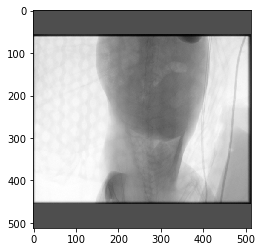

In [102]:
proj_imgs = np.transpose(proj_imgs, (2,0,1))
pylab.imshow(proj_imgs[:,:,100], cmap='gray')

In [104]:
proj_imgs.shape[-1]

308

In [103]:
len(angle1_increment)

311

In [84]:
proj_imgs.shape

(512, 308, 512)

In [ ]:
import astra

In [394]:
rec_cropped = rec[:,10:120,20:170]
rec_cropped[rec_cropped < 0] = 0
rec_cropped = np.transpose(rec_cropped, (2,1,0))

In [395]:
rec_cropped = rec_cropped * -1

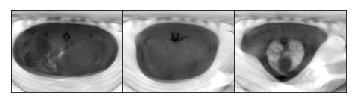

In [366]:
hf.draw_slices(rec_cropped)

In [306]:
print(np.amin(rec[80,10:120,20:170]), np.amax(rec[80,10:120,20:170]))

-59.913471

pylab.imshow(np.transpose(rec[:,:,::-1][50,20:170,10:120], (1,0)), vmin=0.0005)

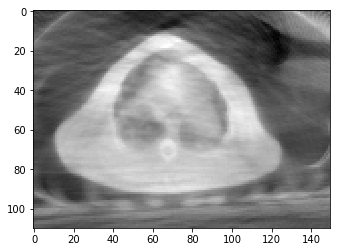

In [23]:
pylab.imshow(rec[100,10:120,20:170])#, vmin=-50, vmax=150) #vmin=.0010, vmax=0.0035)

In [27]:
recon_img = hf.dcm_load(img_dir+"\\15810.dcm")
recon_img = np.transpose(recon_img, (1,2,0))[::-1,:,:]